In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train  = pd.read_csv('df_train.csv')
df_test  = pd.read_csv('df_test.csv')

342 of 891 passengers survived and it is the 38.38% of the training set.
549 of 891 passengers did not survive and it is the 61.62% of the training set.


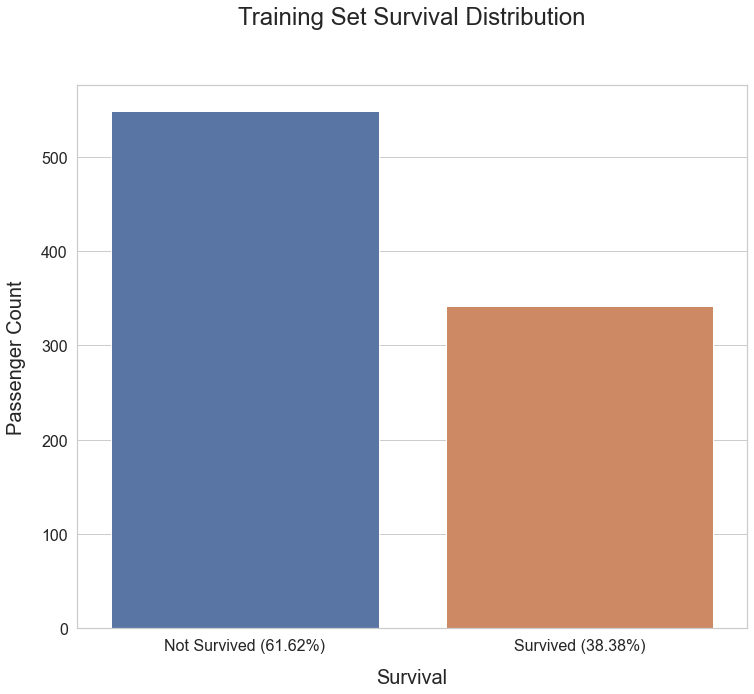

In [4]:
survived = df_train['Survived'].value_counts()[1]
not_survived = df_train['Survived'].value_counts()[0]
survived_per = survived / df_train.shape[0] * 100
not_survived_per = not_survived / df_train.shape[0] * 100

print('{} of {} passengers survived and it is the {:.2f}% of the training set.'.format(survived, df_train.shape[0], survived_per))
print('{} of {} passengers did not survive and it is the {:.2f}% of the training set.'.format(not_survived, df_train.shape[0], not_survived_per))

plt.figure(figsize=(12, 10))
sns.countplot(df_train['Survived'])

plt.xlabel('Survival', size=20, labelpad=15)
plt.ylabel('Passenger Count', size=20, labelpad=15)
plt.xticks((0, 1), ['Not Survived ({0:.2f}%)'.format(not_survived_per), 'Survived ({0:.2f}%)'.format(survived_per)])
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)

plt.title('Training Set Survival Distribution', size=24, y=1.10)

plt.show()

## Correlation

In [5]:
df_train_corr = df_train.drop(['PassengerId'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)
# Training Data

df_test_corr = df_test.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)
# Test Data

In [7]:
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1
df_train_corr_nd[corr]
# The highest correlation among features in the training set is 0.549500 - 'Fare' and 'Pclass'.
# There are 9 correlations in the training set that are higher than 0.1

,Feature 1,Feature 2,Correlation Coefficient
8,Fare,Pclass,0.549500
10,Age,Pclass,0.417667
12,SibSp,Parch,0.414838
14,Survived,Pclass,0.338481
16,Fare,Survived,0.257307
18,SibSp,Age,0.249747
20,Parch,Fare,0.216225
22,Parch,Age,0.176733
24,Fare,SibSp,0.159651
26,Age,Fare,0.124061


In [8]:
corr = df_test_corr_nd['Correlation Coefficient'] > 0.1
df_test_corr_nd[corr]
# The highest correlation between features ('Pclass' and 'Fare') is 0.577489 in the test set.
# There are 6 correlations in the test set that are higher than 0.1.

,Feature 1,Feature 2,Correlation Coefficient
10,Pclass,Fare,0.577489
12,Age,Pclass,0.526789
14,Age,Fare,0.345347
16,Parch,SibSp,0.306895
18,Parch,Fare,0.230410
20,Fare,SibSp,0.172032


### HeatMap

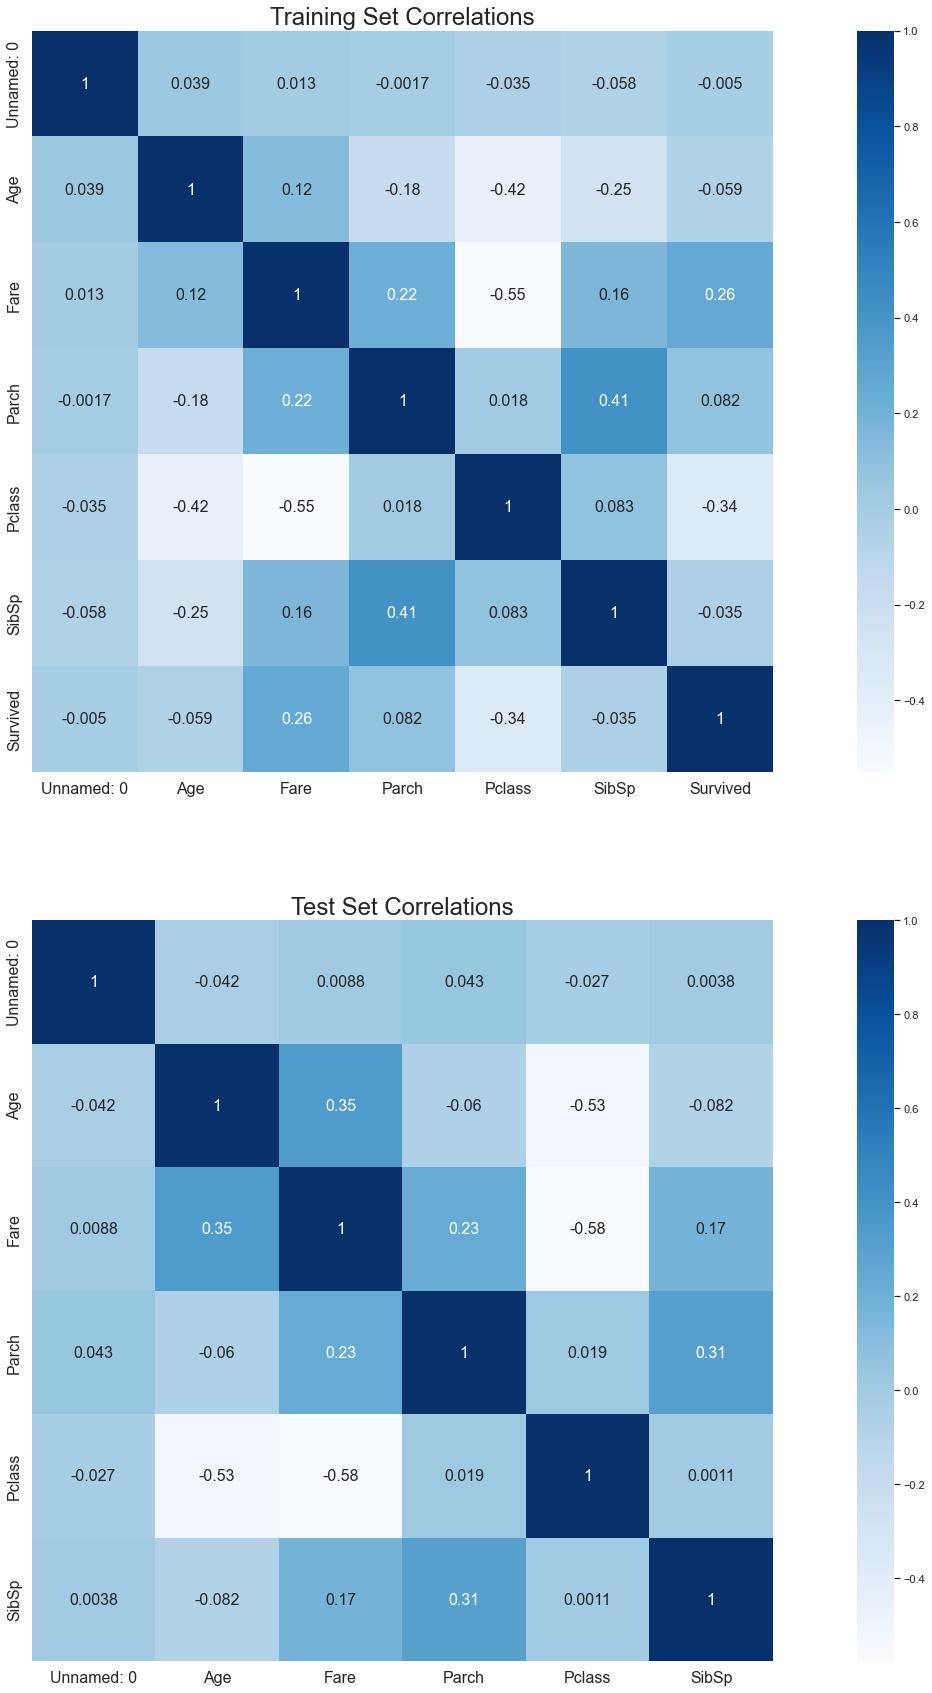

In [9]:
fig, axs = plt.subplots(nrows=2, figsize=(30, 30))

sns.heatmap(df_train.drop(['PassengerId'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='Blues', annot_kws={'size': 16})
sns.heatmap(df_test.drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='Blues', annot_kws={'size': 16})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=16)
    axs[i].tick_params(axis='y', labelsize=16)
    
axs[0].set_title('Training Set Correlations', size=24)
axs[1].set_title('Test Set Correlations', size=24)

plt.show()
# This is a heatmap that visualizes the correlations of the features in the training and test sets.

### Continuous Feature

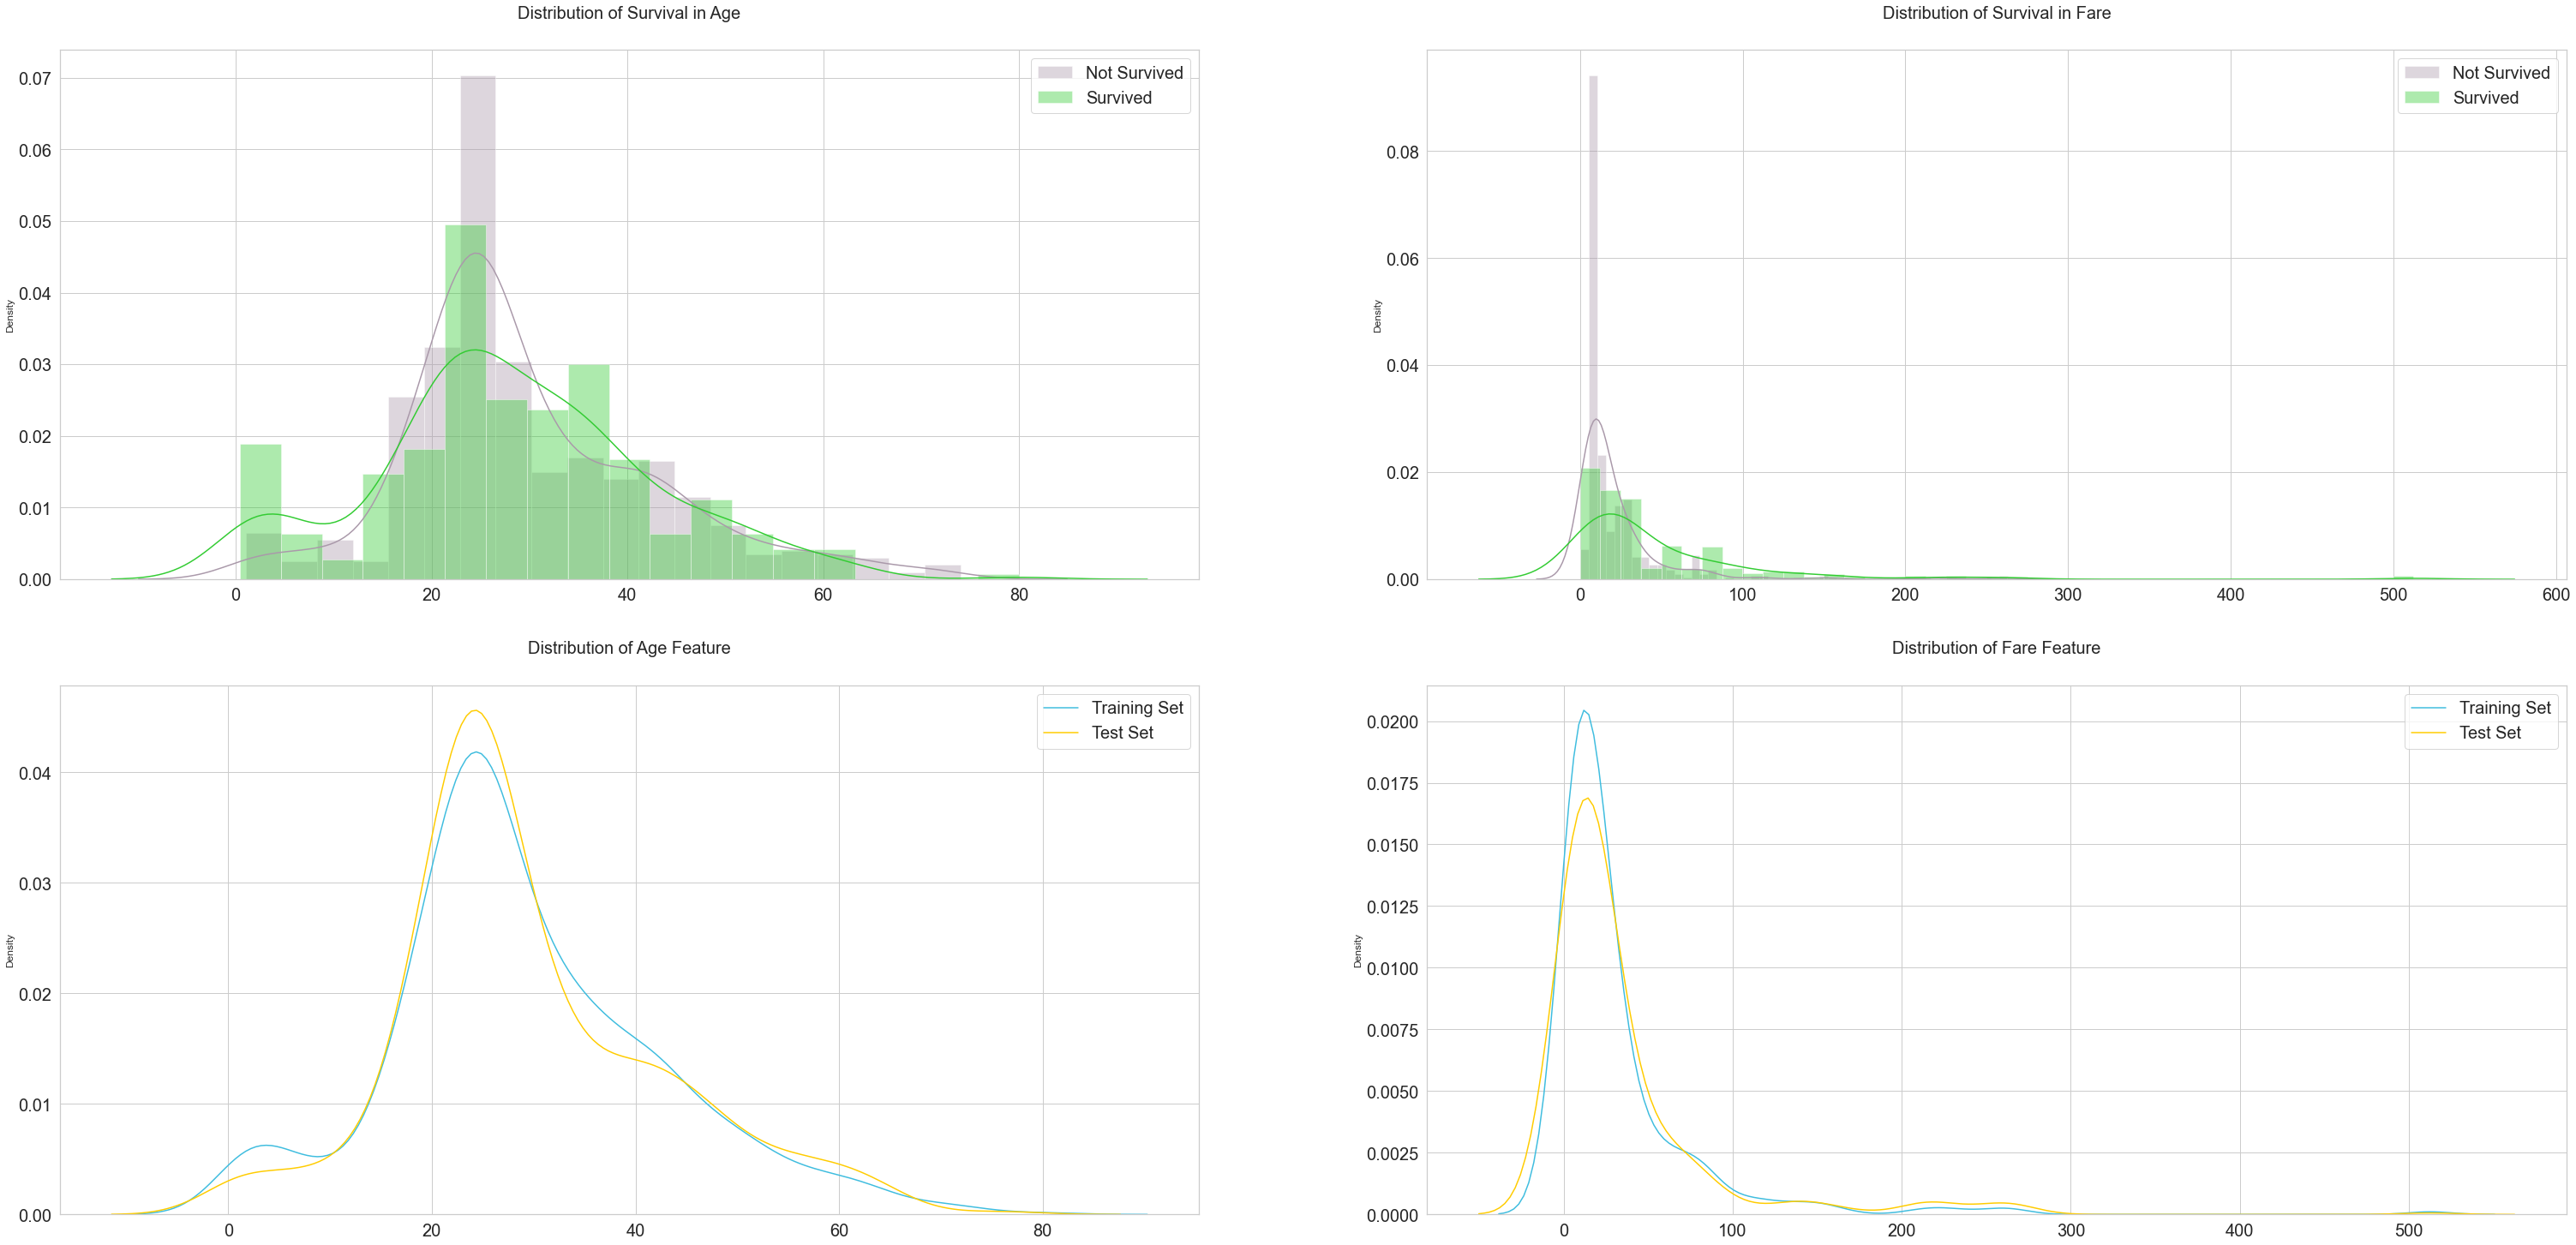

In [10]:
cont_features = ['Age', 'Fare']
surv = df_train['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(25, 25))
plt.subplots_adjust(right=1.75)

for i, feature in enumerate(cont_features):    
    # Distribution of Survival in 'Age' and 'Fare' features
    sns.distplot(df_train[~surv][feature], label='Not Survived', hist=True, color='#aa99aa', ax=axs[0][i])
    sns.distplot(df_train[surv][feature], label='Survived', hist=True, color='#33cc33', ax=axs[0][i])
    
    # Distribution of 'Age' and 'Fare' features in the training and test sets
    sns.distplot(df_train[feature], label='Training Set', hist=False, color='#3fbddf', ax=axs[1][i])
    sns.distplot(df_test[feature], label='Test Set', hist=False, color='#ffcc00', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()
# Distribution of Age feature clearly shows that children younger than 15 has a higher survival rate than any of the other age groups
# In distribution of Fare feature, the survival rate is higher on distribution tails. The distribution also has positive skew because of the extremely large outliers

### Categorical Feature

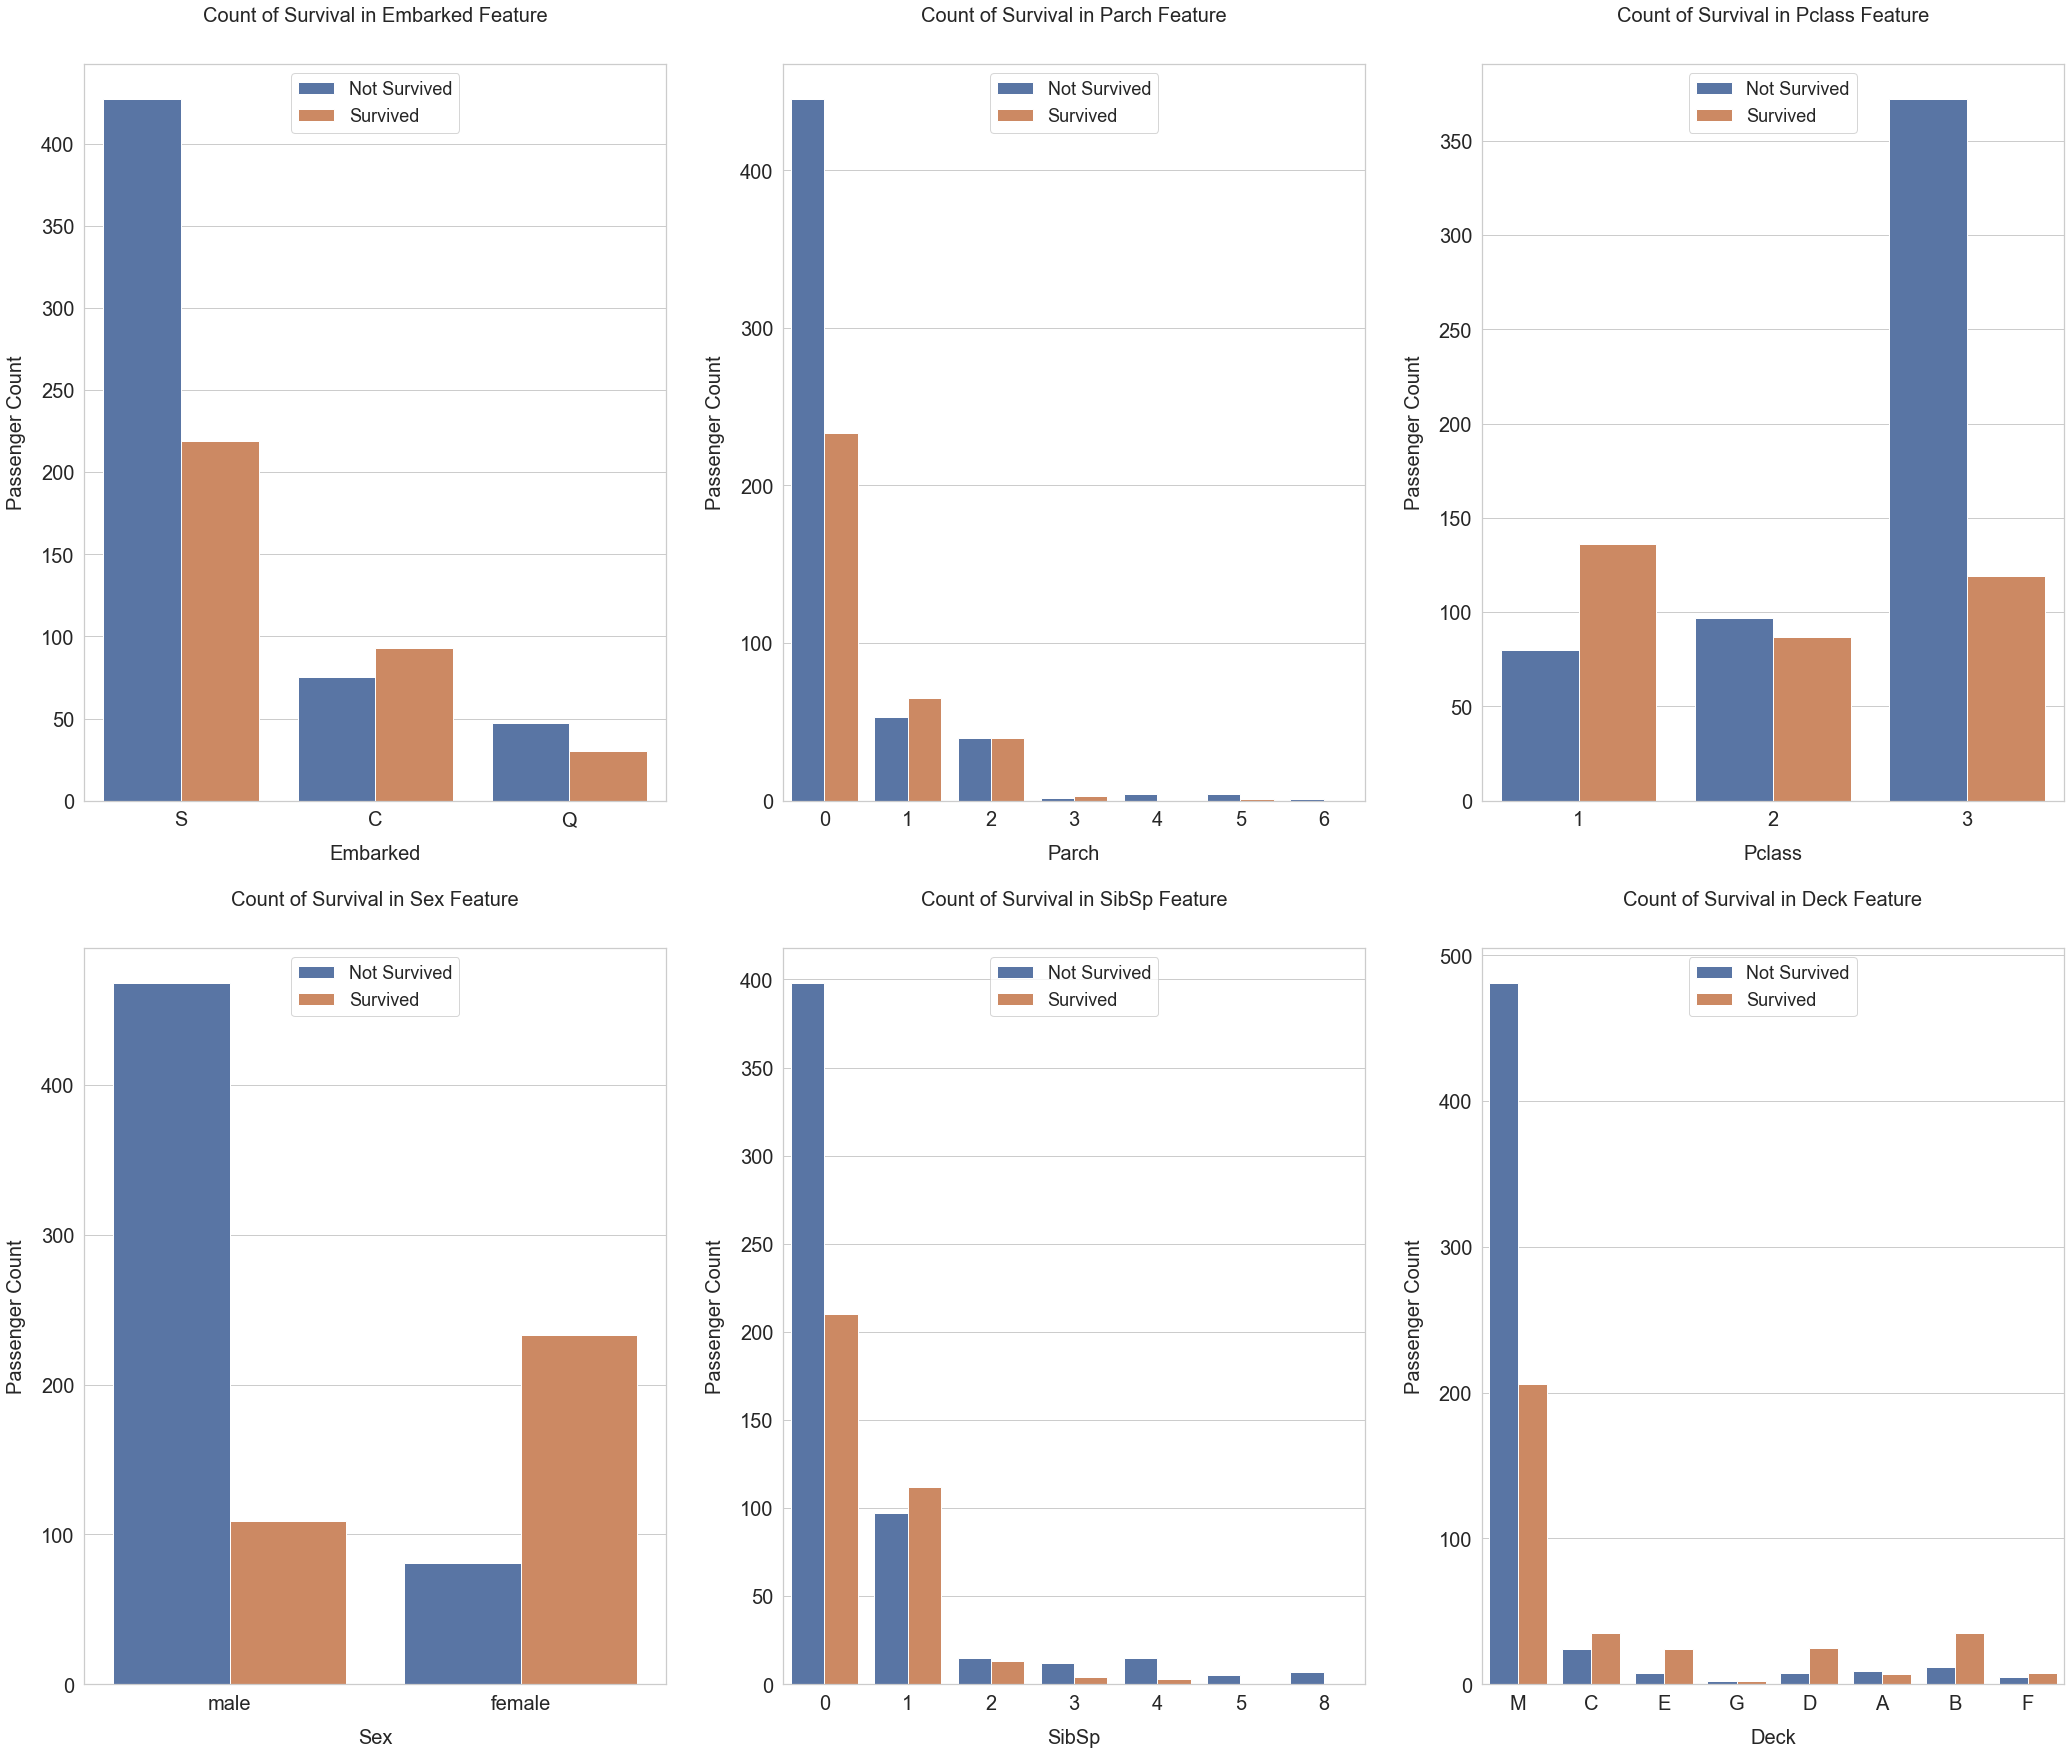

In [11]:
categorical_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(categorical_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

In [14]:
def concatenated_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_all = concatenated_df(df_train, df_test)
df_all.head()
df_all.to_csv('df_all.csv')